Model to determine Loan Status

In [1]:
import pandas as pd

In [2]:
df_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(df_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
#defining function for description/feature info
def feat_info(col_name):
    print(df_info.loc[col_name]['Description'])

In [5]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_LC = pd.read_csv('DATA/lending_club_loan_two.csv')

In [8]:
df_LC.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df_LC.info()   # missing data visible from info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

EDA to detect relationships

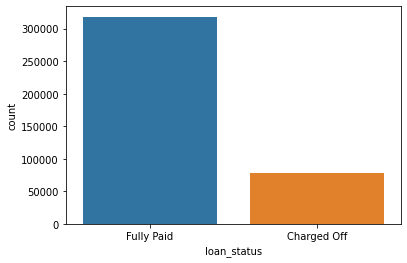

In [10]:
sns.countplot(x='loan_status',data=df_LC)

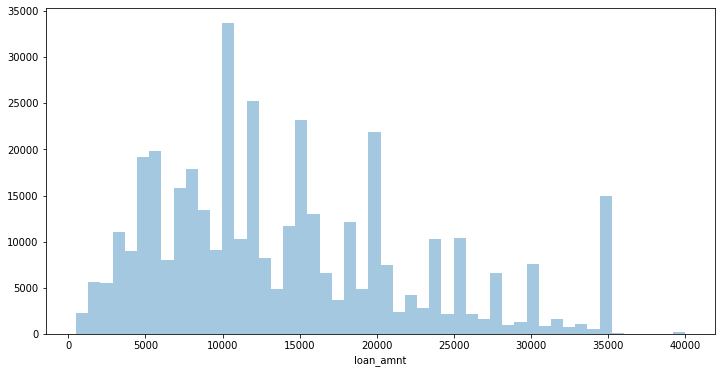

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(df_LC['loan_amnt'],kde=False)

In [12]:
corr=df_LC.corr()

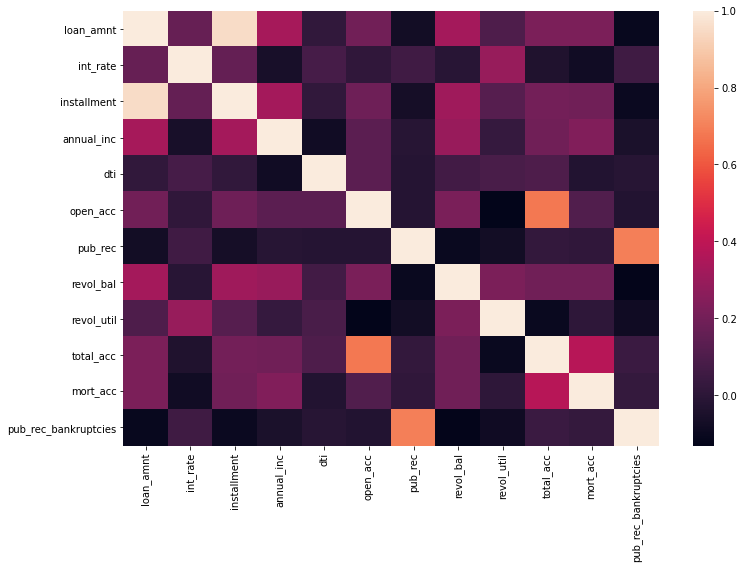

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

In [14]:
feat_info('installment')
feat_info('loan_amnt')
#0.95 correlation seems like duplicated information and strongly due to dependency

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


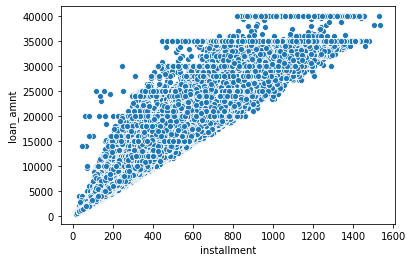

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df_LC)

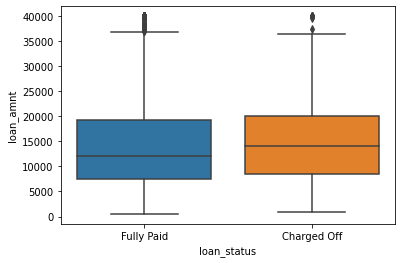

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df_LC)

In [17]:
df_LC.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
sorted(df_LC['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sg_order=sorted(df_LC['sub_grade'].unique())

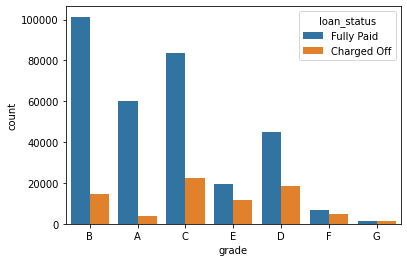

In [20]:
sns.countplot(x='grade',data=df_LC,hue='loan_status')

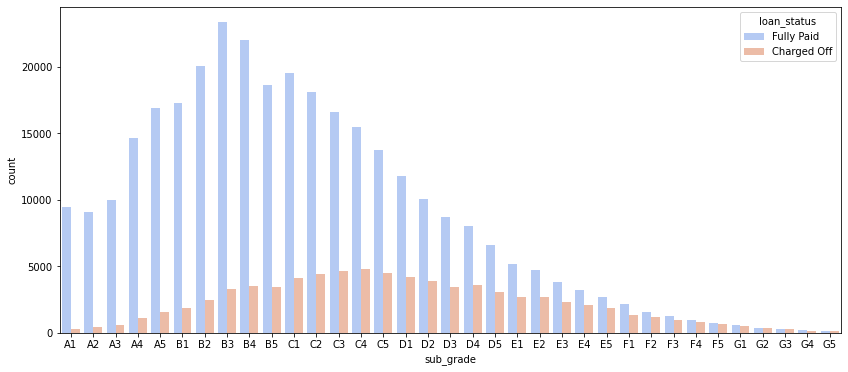

In [21]:
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade',data=df_LC,hue='loan_status',order=sg_order,palette='coolwarm')

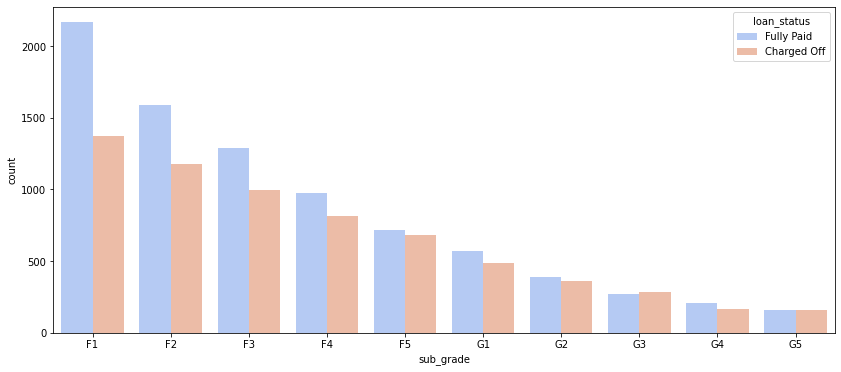

In [22]:
# to obtain only the tail with F&G grades with a lower payback rate
fg=df_LC[(df_LC['grade']=='F') | (df_LC['grade']=='G')]
sg_order2=sorted(fg['sub_grade'].unique())
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade',data=fg,hue='loan_status',order=sg_order2,palette='coolwarm')

Inserting New Column to make the loan status as a binary column

In [23]:
df_LC['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [24]:
df_LC['loan_repaid']=df_LC['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [25]:
df_LC[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [26]:
df_LC.corr()['loan_repaid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

In [27]:
corr=df_LC.corr()['loan_repaid'].drop('loan_repaid').sort_values()

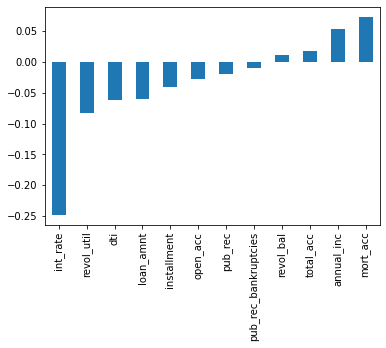

In [28]:
corr.plot(kind='bar')

Missing Data Analysis

In [29]:
len(df_LC)

396030

In [30]:
df_LC.isnull().sum()#finding total missing values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
df_LC.isnull().sum()/len(df_LC)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [33]:
df_LC['emp_title'].nunique()

173105

In [34]:
df_LC['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Kraft Foods, Inc.                 1
kaiser permante                   1
greenfield family dentistry       1
Communications IT                 1
echer                             1
Name: emp_title, Length: 173105, dtype: int64

In [35]:
df_LC=df_LC.drop('emp_title',axis=1)

In [36]:
sorted(df_LC['emp_length'].dropna().unique()) # can't arrange with null values

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [37]:
emp_len_order=[ '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

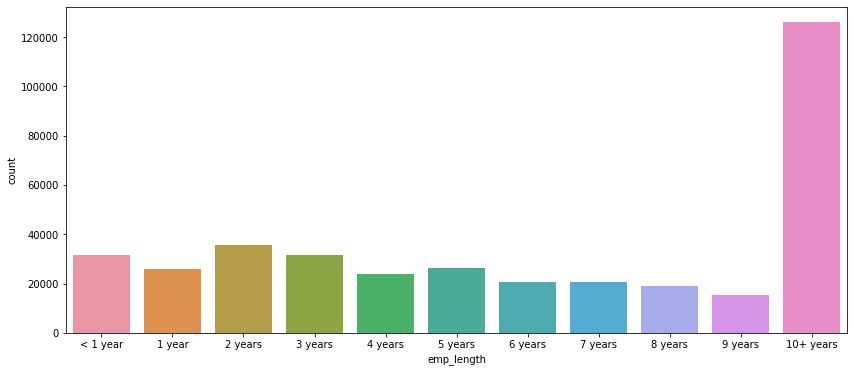

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df_LC,order=emp_len_order)

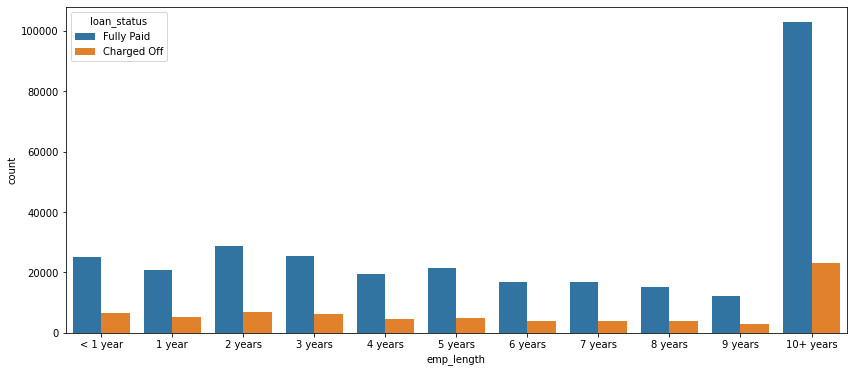

In [39]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df_LC,order=emp_len_order,hue='loan_status')

To calculate the percentage i have taken (total counts-total fully paid)/(total fully paid) note: sum() will give sum of 1s for newly created column to give sum of fully paid

In [40]:
(df_LC.groupby('emp_length')['loan_repaid'].count()-df_LC.groupby('emp_length')['loan_repaid'].sum())/df_LC.groupby('emp_length')['loan_repaid'].sum()

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

In [41]:
#dropping off the column due to similar charge off % across all emp lengths
df_LC=df_LC.drop('emp_length',axis=1)

In [42]:
df_LC.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [43]:
# working on the purpose:
df_LC['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [44]:
df_LC['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [45]:
df_LC=df_LC.drop('title',axis=1)

In [46]:
feat_info('mort_acc')

Number of mortgage accounts.


In [47]:
df_LC['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [48]:
df_LC.corr()['mort_acc'].sort_values() # note total_acc does not hav emissing values and holds highest correlation with this column

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [49]:
mort_acc_avg= df_LC.groupby('total_acc')['mort_acc'].mean() # calculating mean of mort_acc grouped by total_acc

In [50]:
mort_acc_avg[2.0]

0.0

In [51]:
# note there are errors due to indentation blocks
def mort_acc_fill(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_avg[total_acc]
    else : 
        return mort_acc

In [52]:
df_LC['mort_acc'] = df_LC.apply(lambda x: mort_acc_fill(x.total_acc, x.mort_acc), axis=1) #using lanbda syntax from stackoverflow

In [53]:
df_LC.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [54]:
# dropping rows with na records in the two columns drops from 396030
df_LC=df_LC.dropna()

In [55]:
df_LC.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [56]:
df_LC.select_dtypes(['object']).columns #call function for non numeric columns to convert into dummy

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [57]:
df_LC['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [58]:
df_LC['term']=df_LC['term'].apply(lambda term: int(term[:3]))

In [59]:
df_LC=df_LC.drop('grade',axis=1)

Converting the subgrade column into Dummy variables or using one hot encoding

In [60]:
dummies= pd.get_dummies(df_LC['sub_grade'],drop_first=True)

In [61]:
df_LC=pd.concat([df_LC,dummies],axis=1)

In [62]:
df_LC=df_LC.drop('sub_grade',axis=1)

In [63]:
df_LC.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [64]:
df_LC['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [65]:
#Implementing same steps for other columns
dummies= pd.get_dummies(df_LC[['verification_status','initial_list_status', 'application_type','purpose']],drop_first=True)
df_LC=pd.concat([df_LC,dummies],axis=1)
df_LC=df_LC.drop(['verification_status','initial_list_status', 'application_type','purpose'],axis=1)

In [66]:
df_LC.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [67]:
df_LC['home_ownership'].value_counts() # primarily 3 classes

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [68]:
df_LC['home_ownership']=df_LC['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [69]:
df_LC['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [70]:
dummies= pd.get_dummies(df_LC['home_ownership'],drop_first=True)
df_LC=pd.concat([df_LC,dummies],axis=1)
df_LC=df_LC.drop('home_ownership',axis=1)

In [71]:
df_LC.columns # 3 columns get added

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [72]:
df_LC['address'].loc[-5:]

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [73]:
df_LC['zipcode']=df_LC['address'].apply(lambda address: int(address[-5:])) # feature extraction similar to term column operation

In [74]:
df_LC['zipcode'].value_counts() # can be converted to dummies

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [75]:
dummies= pd.get_dummies(df_LC['zipcode'],drop_first=True)
df_LC=pd.concat([df_LC,dummies],axis=1)
df_LC=df_LC.drop(['zipcode','address'],axis=1)  #Dropping both zipcode & address columns

In [76]:
#drop issue date column as we would not issue loan if customer wont pay back
df_LC=df_LC.drop( 'issue_d',axis=1)

In [77]:
df_LC['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [78]:
df_LC['earliest_cr_line']= df_LC['earliest_cr_line'].apply(lambda earliest_cr_line: int(earliest_cr_line[-4:]))

In [79]:
df_LC.columns

Index([                          'loan_amnt',
                                      'term',
                                  'int_rate',
                               'installment',
                                'annual_inc',
                               'loan_status',
                                       'dti',
                          'earliest_cr_line',
                                  'open_acc',
                                   'pub_rec',
                                 'revol_bal',
                                'revol_util',
                                 'total_acc',
                                  'mort_acc',
                      'pub_rec_bankruptcies',
                               'loan_repaid',
                                        'A2',
                                        'A3',
                                        'A4',
                                        'A5',
                                        'B1',
                                  

Train test Split & Data Normalising using Minmaxscaler

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
df_LC=df_LC.drop( 'loan_status',axis=1)

In [82]:
y=df_LC['loan_repaid'].values
X=df_LC.drop( 'loan_repaid',axis=1).values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()

In [86]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [94]:
X_train.shape

(316175, 78)

Model Creation

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [93]:
#df_LC.info() will give 1 output for 78 inputs 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
loan_amnt                              395219 non-null float64
term                                   395219 non-null int64
int_rate                               395219 non-null float64
installment                            395219 non-null float64
annual_inc                             395219 non-null float64
dti                                    395219 non-null float64
earliest_cr_line                       395219 non-null int64
open_acc                               395219 non-null float64
pub_rec                                395219 non-null float64
revol_bal                              395219 non-null float64
revol_util                             395219 non-null float64
total_acc                              395219 non-null float64
mort_acc                               395219 non-null float64
pub_rec_bankruptcies                   395219 non-null float64
loan_repaid

assuming a 78-39-1 layer

In [107]:
loan_model=Sequential()
loan_model.add(Dense(78,activation='relu'))
loan_model.add(Dropout(0.2))

loan_model.add(Dense(39,activation='relu'))
loan_model.add(Dropout(0.2))

loan_model.add(Dense(1,activation='sigmoid'))


In [108]:
loan_model.compile(loss='binary_crossentropy',optimizer='adam')

In [109]:
loan_model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2977 - val_loss: 0.2656
Epoch 2/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2649 - val_loss: 0.2640
Epoch 3/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2623 - val_loss: 0.2631
Epoch 4/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2610 - val_loss: 0.2620
Epoch 5/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2602 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2595 - val_loss: 0.2614
Epoch 7/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2593 - val_loss: 0.2614
Epoch 8/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2586 - val_loss: 0.2609
Epoch 9/25
316175/316175 [==============================] - 7s 22us/sample - 

In [110]:
losses=pd.DataFrame(loan_model.history.history)

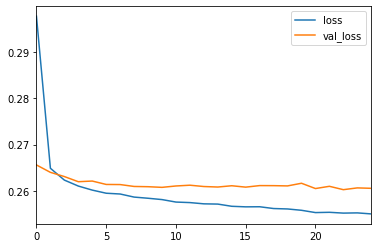

In [111]:
losses.plot()

For model evaluation ( predicted classed for confusion matrix)

In [112]:
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
prediction= loan_model.predict_classes(X_test)

In [114]:
confusion_matrix(y_test,prediction)

array([[ 7227,  8431],
       [  445, 62941]], dtype=int64)

In [115]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044

